# Lab 3 - Clustering
### Group_4 - Yang Zhang, Reannan McDaniel, Jonathon Roach, Fred Poon
### 8/9/2020
### MSDS_7331

# Table of contents
1. [Business Understanding](#business-understanding) <!-- 10 pts Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific dataset and the stakeholders needs? -->
2. [Data Understanding 1](#data-understanding-1) <!-- 10 pts Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems? -->
3. [Data Understanding 2](#data-understanding-2) <!-- 10 pts Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs. -->
4. [Models and Evaluations](#model-evaluation)
    1. [Model and Evaluation 1 - train and parameters](#model-evaluation-1) <!-- 10 pts Train and adjust parameters -->   
    2. [Model and Evaluation 2 - evaluate and compare](#model-evaluation-2) <!-- 10 pts Evaluate and Compare -->    
    3. [Model and Evaluation 3 - visualize](#model-evaluation-3) <!-- 10 pts Visualize Results -->    
    4. [Model and Evaluation 4 - summarize](#model-evaluation-4) <!-- 20 pts Summarize the Ramifications -->    
5. [Deployment](#deployment) <!-- 10 pts Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.? -->
6. [Exceptional Work](#exceptional-work) <!-- 10 pts You have free reign to provide additional analyses or combine analyses. -->

## Business Understanding <a name="business-understanding"></a>
For this analysis, our group will be working with North Carolina Public Schools Report Card and Statistical Profiles Data sets from the years 2014 to 2017. These data sets encompass information across 4 continuous years of educational attributes in North Carolina, USA. The data is collected from the State of North Carolina at https://www.dpi.nc.gov/ and made available from the Belk Endowment Educational Attainment Data Repository for North Carolina Public Schools by Dr. Jake Drew. Among other reasons, the data was collected for evaluation of public-school performance for the purpose of efficiently allocating funds to various educational initiatives. Analyses of such data are important because high-impact educational initiatives that are well-funded contribute to increased graduation rates, increased achievement at the post-secondary level, less crime, and greater economic engagement among young people. For the purpose of this exercise, our focus is on predicting graduation rates using various school characteristics, such as type of school (elementary, middle, high, or some combination of the three), social demographics, economic demographics, and location between 2014 and 2017. The Belk Foundation's website says, "Our goal is to empower today’s workforce by creating pathways to and through postsecondary education for underrepresented students".
For the sake of this analysis, we assume that better performing schools have better outcomes in postsecondary education. With North Carolina's rapidly changing demographics, it is important to take into consideration schools' unique needs when allocating funds to strategic investment initiatives. Here, we explore where funding can be best applied based on educational achievement data.
We will explore through visual and mathematical modeling which features best predict the graduation rate. The analysis will come in a combination of classification models to predict. In this analysis we will observe:

- What cluster model provides a best visualization and accuracy score?
- Can we get a higher accuracy score to improve our classification model?

## Data Understanding - the data <a name="data-understanding-1"></a>
Three separate tasks are performed for the education dataset: The first is preparing the data. Second, we deep dived into our attributes to make a determination on what to use for our clusters. We completed our second tasks by completing a feature importance analysis and evaluating visualizations. Finally, we refitted with our classification task for SPG Grade for analysis with PCA and ROC curve results.

### Data Description

The data set contains 9,731 records and 259 attributes that are comprised of factors, numbers, and characters. A data definition sheet can be found in Dr. Drew's github repository, [https://github.com/jakemdrew/EducationDataNC](https://github.com/jakemdrew/EducationDataNC/tree/master/Data%20Documentation).

Below are some of the common attributes you'll see in our analyses below. For a complete list, the State of North Carolina provides a complete definition of all the attributes within our data set. This can be found on their website [https://www.dpi.nc.gov/](https://www.dpi.nc.gov/).

| Attribute | DataType | Description |
|:---|:---|:---|
| SPG Grade                          | object  | School Performance Grade (Letter Grade - A-D, F) |
| MinorityMalePct                    | float64 | Minority Male Perentage |
| MinorityFemalePct                  | float64 | Minority Female Percentage |
| short_susp_per_c_num               | float64 | Short term suspensions per 100 students at school level |
| avg_daily_attend_pct               | float64 | Average daily attendance percentage at school level |
| title1_type_cd_Y                   | uint8   | Title 1 Status |
| BlackMalePct                       | float64 | Black Male Percentage |
| AsianFemalePct                     | float64 | Asian Female Percentage |
| BlackFemalePct                     | float64 | Black Female Percentage |
| TotalTargets_pTarget_PctMet        | float64 | Percentage of total targets met |
| HispanicMalePct                    | float64 | Hispanic Male Percentage |
| MathGr3-8_pTarget_PctMet           | float64 | Percentage of students meeting Math target in grade levels 3 thru 8 |
| AsianMalePct                       | float64 | Asian Male Percentage |
| SciGr5&8_pTarget_PctMet            | float64 | Percentage of students meeting Science target in grade level 5 & 8 |
| nbpts_num                          | float64 | Number of National Board Certified Staff at school level |
| lea_sat_avg_score_num              | float64 | Average SAT score at LEA level |
| stud_internet_comp_num             | float64 | Ratio of students to internet connected computer at school level |
| st_avg_student_num                 | float64 | Average school size within the State |
| HispanicFemalePct                  | float64 | Hispanic Female Percentage |
| Accomplished_TCHR_Standard 4_Pct   | float64 | Percentage of accomplished teachers with teacher evaluation value of 4 |
| Accomplished_TCHR_Standard 3_Pct   | float64 | Percentage of accomplished teachers with teacher evaluation value of 3 |
| Developing_TCHR_Standard 2_Pct     | float64 | Percentage of developing teachers with teacher evaluation value of 2 |
| Accomplished_TCHR_Standard 5_Pct   | float64 | Percentage of accomplished teachers with teacher evaluation value of 5 |
| 10+ Years_LEA_Exp_Pct_Prin         | float64 | Percentage of principle with more than 10 years of experience at the LEA level |
| 4-10 Years_LEA_Exp_Pct_Prin        | float64 | Percentage of principle with 4-10 years of experience at the LEA level |
| Accomplished_TCHR_Standard 1_Pct   | float64 | Percentage of accomplished teachers with teacher evaluation value of 1 |
| Accomplished_TCHR_Standard 2_Pct   | float64 | Percentage of accomplished teachers with teacher evaluation value of 2 |
| Developing_TCHR_Standard 1_Pct     | float64 | Percentage of developing teachers with teacher evaluation value of 1 |
| pct_GCE_ALL                        | float64 | Percentage of Third Grade Students Passed with Good Cause Exemption |
| 0-3 Years_LEA_Exp_Pct_Prin         | float64 | Percentage of principle with 0-3 years of experience at the LEA level |
| st_emer_prov_teach_pct             | float64 | Emerging teachers at State level |
| lea_sat_participation_pct          | float64 | Percentage of HS students taking an SAT exam at the LEA level |
| lea_ap_participation_pct           | float64 | Advanced Placement participation at LEA level |
| lea_federal_perpupil_num           | float64 | Federal expense per pupil at LEA level |
| lea_local_perpupil_num             | float64 | Local expense per pupil at LEA level |
| advance_dgr_pct                    | float64 | Percent of teachers with masters or higher degree at school dgr |
| Developing_TCHR_Standard 5_Pct     | float64 | Percentage of teacher with level 5 in Developing |
| lateral_teach_pct                  | float64 | Lateral entry teacher percentage at school level |
| lea_flicensed_teach_pct            | float64 | Average Percent of Teachers that meet NC fully licensed |
| Developing_TCHR_Standard 3_Pct     | float64 | Percentage of teacher with level 3 in Developing |
| lea_tchyrs_0thru3_pct              | float64 | LEA level Teacher experiences 0 to 3 years  |
| lea_tchyrs_11plus_pct              | float64 | LEA level Teacher experiences over 11 years |
| lea_nbpts_num                      | float64 | Average number of National Board Certified staff at LEA |
| lea_advance_dgr_pct                | float64 | Average percent of teachers with masters or higher degree at LEA level |
| lea_1yr_tchr_trnovr_pct            | float64 | One Year Teacher turnover percentage at school level |
| lea_emer_prov_teach_pct            | float64 | Emerging teachers at LEA level |
| st_flicensed_teach_pct             | float64 | Average Percent of Teachers that meet NC fully licensed |
| st_tchyrs_0thru3_pct               | float64 | Percentage of teachers with 4-10 years of experience at the State level |
| st_1yr_tchr_trnovr_pct             | float64 | Standardize One Year Teacher turnover percentage at school level |
| lea_tchyrs_4thru10_pct             | float64 | Percentage of teachers with 4-10 years of experience at the LEA level |
| Category_Cd_T                      | uint8   | School with Category code T (School has middle and high school grades) |

### Data Quality
#### Summary
As mentioned above, the established data files (from 2014 to 2019) provided by Dr. Drew processed from raw data*. Further data wrangling efforts are conducted to (1) make the data files more reproducible for use with machine learning modeling and (2) combine the data files based on calendar years together so we can find trends. We will go into more detail below.

In process (1) we will tackle data wrangling. We refer to Dr. Drew’s data cleaning scripts** including multiple impute and cleaning process. During exploratory data analysis, we manipulated categorical variables to remove outliers. We re-mapped the categorical variable, category_cd, so it could be reproducible. We also filtered the data on school_type_txt which showed an overwhelming favor to Regular Schools. We that, we separated a new data frame just to Regular Schools. The final significant data manipulation is to SPG Score. We filtered out 0’s as it does not make sense to train a model with data that is missing a response variable.

For our process (2) we merged all year-based data files together between 2014 and 2017. Because discrepancies in data 2018/2019, including incomplete data, an inner join process is conducted and the resulted combined dataset that totaled 259 attributes and 9731 rows.

#### References
*[http://nbviewer.jupyter.org/github/jakemdrew/EducationDataNC/blob/master/2014/School%20Datasets/PublicSchools2014.csv]( http://nbviewer.jupyter.org/github/jakemdrew/EducationDataNC/blob/master/2014/School%20Datasets/PublicSchools2014.csv)
**[https://nbviewer.jupyter.org/github/jakemdrew/EducationDataNC/tree/master/2014/Machine%20Learning%20Datasets/Source%20Code/PublicSchools2014_ML.ipynb](https://nbviewer.jupyter.org/github/jakemdrew/EducationDataNC/tree/master/2014/Machine%20Learning%20Datasets/Source%20Code/PublicSchools2014_ML.ipynb)

#### Data Wrangling

It is important to understand the types of schools that are relevant to this analysis. Let's first take a look at school type and see if there are any anomolies (schools for children with disabilities, for example).

Some of these categories have very little representation in the data. For now, we'll remedy this by lumping the combo groups together.

We now need to somehow get at the idea of demographic composition of schools. Dr. Drew and his capstone groups have shown that classifying schools as majority-minority when they are composed of >50% non-white students highlights meaningful differences in school performance (likely due to the fact that demographics can serve as a stand-in for economic measures). Let's take the same approach.

### Data Preparation
Within the 259 variables in the The North Carolina Education dataset, we are interested in understanding how School Performance Grade or SPG Grade is calculated and what attributes have the most effect on the classification. It is important to understand what SPG Grade is and how it is calculated. SPG Grade is a letter grade of “A”-“F” that is comprised of SPG Score, a number grade of 0-100. The scoring is rubric is “A” = SPG Score of 85-100, “B” = 70-84, “C” = 55-69, “D” = 40-54, “F” = < 40. We also need to explain how SPG Score is generated. The school achievement score makes 80% of the SPG Score and it measures EOG (End of Grade)Reading and Math for grades 3-8, EOC (End of Course) science, biology, math and english and ACT scores and Graduation Rates. EVAAS (Education Value-Added Assessment System) Growth Score makes up the remaining 20% of the SPG Score. This attribute includes education value added assessment system and composite index of growth. When evaluating SPG Grade, it is important to remove or make note of these variables in the list of dependent variables in the model due to the correlation will be skewed.

Data Preparation Workflow
- Data Merge
- One Hot-encoding
- Feature Selection
- Data Balancing

We combined dataset of all public schools in north Carolina from year 2014-2017 together. We also add a variable "Year" to note the calendar year the data come from.

In [5]:
# required libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warnings
warnings.filterwarnings("ignore")

# For multiple line outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
# read in CSV
df2014 = pd.read_csv('https://raw.githubusercontent.com/fredpoon/ds_7331_jyrf_eda/master/Data_Prep/PublicSchools2014_MLnew.csv')
df2015 = pd.read_csv('https://raw.githubusercontent.com/fredpoon/ds_7331_jyrf_eda/master/Data_Prep/PublicSchools2015_MLnew.csv')
df2016 = pd.read_csv('https://raw.githubusercontent.com/fredpoon/ds_7331_jyrf_eda/master/Data_Prep/PublicSchools2016_MLnew.csv')
df2017 = pd.read_csv('https://raw.githubusercontent.com/fredpoon/ds_7331_jyrf_eda/master/Data_Prep/PublicSchools2017_MLnew.csv')

df2014.shape
df2015.shape
df2016.shape
df2017.shape

df2014['Year'] = 2014
df2015['Year'] = 2015 
df2016['Year'] = 2016 
df2017['Year'] = 2017

frames = [df2014, df2015, df2016, df2017]
df_comb_test = pd.concat(frames,join='inner', ignore_index=True)

df_comb_test.info()

(2426, 318)

(2432, 335)

(2430, 328)

(2443, 328)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9731 entries, 0 to 9730
Columns: 259 entries, vphone_ad to Year
dtypes: float64(237), int64(2), object(20)
memory usage: 19.2+ MB


#### One Hot-encoding
A one-hot encoding procedure has been conducted to convert all of the categorical variables into continuous variables to assist in achieving the best prediction . The procedure is shown below: 8 variables with more than 25 unique values are deleted, with 38 new variables having been generated from one hot-encoding process.

In [7]:
schoolData = df_comb_test

#Locate the categorical variables in dataset
sD_nominal = schoolData.loc[:, (schoolData.dtypes == object)]
uniqueThreshold = 25

#Delete categorical columns with > 25 unique values (Each unique value becomes a column during one-hot encoding)
oneHotUniqueValueCounts = schoolData[sD_nominal.columns].apply(lambda x: x.nunique())
oneHotUniqueValueCols = oneHotUniqueValueCounts[oneHotUniqueValueCounts >= uniqueThreshold].index
schoolData.drop(oneHotUniqueValueCols, axis=1, inplace=True) 

#Review dataset contents one hot high unique value drops
print('*********After: Removing columns with >= uniqueThreshold unique values***********')
schoolData.info(verbose=False)
print ('\r\nColumns Deleted: ', len(oneHotUniqueValueCols))

*********After: Removing columns with >= uniqueThreshold unique values***********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9731 entries, 0 to 9730
Columns: 250 entries, szip_ad to Year
dtypes: float64(237), int64(2), object(11)
memory usage: 18.6+ MB

Columns Deleted:  9


In [8]:
#Keep an original copy of the Data
schoolData_org = schoolData

#Pop out the SPG information from the Data
schoolData_SPG = schoolData.pop('SPG Grade')
schoolData_SPGScore = schoolData.pop('SPG Score')

# Remove All the Columns that directly used to calculate SPG Grade and Score
schoolData.drop(schoolData.iloc[:, 21:162], inplace=True, axis=1)
schoolData.info(verbose=True)

#Isolate remaining categorical variables
begColumnCt = len(schoolData.columns)

#one hot encode categorical variables
schoolData = pd.get_dummies(data=schoolData,drop_first=True)

#Determine change in column count
endColumnCt = len(schoolData.columns)
columnsAdded = endColumnCt - begColumnCt

#Review dataset contents one hot high unique value drops
print('Columns To One-Hot Encode: ', len(sD_nominal.columns))
print('\r\n*********After: Adding New Columns Via One-Hot Encoding*************************')
schoolData.info(verbose=False)
print ('\r\nNew Columns Created Via One-Hot Encoding: ', columnsAdded)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9731 entries, 0 to 9730
Data columns (total 107 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   szip_ad                              float64
 1   category_cd                          object 
 2   calendar_type_txt                    object 
 3   sna_pgm_type_cd                      object 
 4   school_type_txt                      object 
 5   calendar_only_txt                    object 
 6   title1_type_cd                       object 
 7   esea_status                          object 
 8   student_num                          float64
 9   lea_avg_student_num                  float64
 10  st_avg_student_num                   float64
 11  Grad_project_status                  object 
 12  Math I_Size                          float64
 13  lea_total_expense_num                float64
 14  lea_salary_expense_pct               float64
 15  lea_services_expense_pct             

"SPG Grade" is our response variable and "SPG Score" is the continuous expression of it. "SPG Score" is a composite score calculated from schools' average scores based on multiple assessments. The "SPG Grade" is converted from "SPG Score" by ranges. We have to removed “SPG Grade” and “SPG Score” from the original dataset.
Our analysis indicates we found that a few attributes were directly used to calculate our response variable. With this in mind, we removed these attributes from the dataset. Features which are discarded include end-of-course, end-of-grade scores and any features related to EVAAS growth metrics. For example: EOG_XXX, EOC_XXX.
After removing them, we display the information for the variables to ensure they no longer appear in the dataset. After these steps the final dataset includes 148 features in total.

,0
count,9216
unique,5
top,C
freq,3973


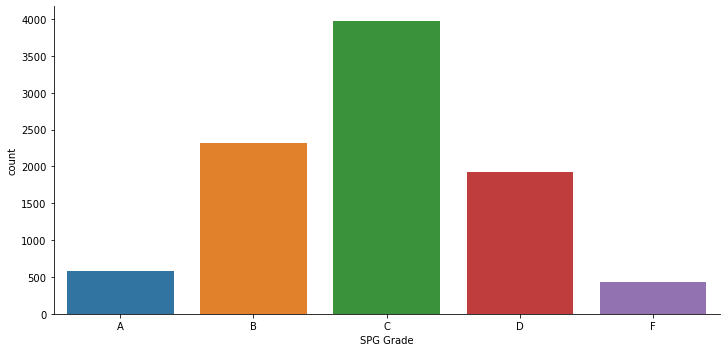

In [10]:
schoolData_SPG_org = schoolData_SPG
#schoolData_SPG = schoolData_SPG_org

import numpy as np
schoolData_SPG= np.select(
    [
        schoolData_SPG == 'A', 
        schoolData_SPG == 'B',
        schoolData_SPG == 'C',
        schoolData_SPG == 'D',
        schoolData_SPG == 'F',
        schoolData_SPG == 'A+NG',
        schoolData_SPG == 'I'
    ], 
    [
        'A', 
        'B',
        'C',
        'D',
        'F',
        'A',
        'NA'
    ],
    default='NA'
)

#Filter out the sample with "NA" on SPG Grade
schoolData_SPG_new = schoolData_SPG[schoolData_SPG!='NA']
schoolData_pick_new = schoolData_pick[schoolData_SPG!='NA']

# Check if the levels of SPG Grade has been altered
s = pd.DataFrame(schoolData_SPG_new)
s.describe()

#Factor Plot for SPG Grade
s.columns=['SPG Grade']

sns.factorplot("SPG Grade", data=s, aspect=2,
                       kind="count", order=['A','B','C','D','F'])

plt.show()

##### Feature Selection
Our new dataset includes 148 features. We do not want to include this many features for model feasibility and clustering. However, as we have a data size requirement, and we also want the constructing model to be high quality. We decide to conduct a feature selection process to choose the most important features to use.

There are many ways to conduct feature selection. In this project we use random forest and plot out feature importances of all features. Note that the work below is not for feasible model construction (we didn't split train/test) but just for picking out the most important variables to use.

In [11]:
# Random Forest apply to X with all variables
from sklearn.ensemble import RandomForestClassifier
clfa=RandomForestClassifier(n_estimators=100)
clfa.fit(schoolData,schoolData_SPG)
y_pred=clfa.predict(schoolData)

#For feature importance from RandomForestClassifier()
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(clfa, random_state=1).fit(schoolData,schoolData_SPG)
eli5.show_weights(perm, feature_names = schoolData.columns.tolist(), top=50)

RandomForestClassifier()

Weight,Feature
0.0565 ± 0.0045,TotalTargets_pTarget_PctMet
0.0072 ± 0.0014,MinorityMalePct
0.0053 ± 0.0007,MinorityFemalePct
0.0033 ± 0.0005,short_susp_per_c_num
0.0016 ± 0.0004,title1_type_cd_Y
0.0013 ± 0.0003,AsianFemalePct
0.0009 ± 0.0003,BlackFemalePct
0.0008 ± 0.0003,BlackMalePct
0.0007 ± 0.0003,avg_daily_attend_pct
0.0003 ± 0.0002,MathGr3-8_pTarget_PctMet


In [9]:
#Pick and Choose variables
schoolData_pick = schoolData[[
'TotalTargets_pTarget_PctMet',
'MinorityMalePct',
'MinorityFemalePct',
'short_susp_per_c_num',
'avg_daily_attend_pct',
'title1_type_cd_Y',
'BlackMalePct',
'AsianFemalePct',
'BlackFemalePct',
'HispanicMalePct',
'MathGr3-8_pTarget_PctMet',
'AsianMalePct',
'SciGr5&8_pTarget_PctMet',
'nbpts_num',
'lea_sat_avg_score_num',
'stud_internet_comp_num',
'st_avg_student_num',
'HispanicFemalePct',
'Accomplished_TCHR_Standard 4_Pct',
'Accomplished_TCHR_Standard 3_Pct',
'Developing_TCHR_Standard 2_Pct',
'Accomplished_TCHR_Standard 5_Pct',
'10+ Years_LEA_Exp_Pct_Prin',
'4-10 Years_LEA_Exp_Pct_Prin',
'Accomplished_TCHR_Standard 1_Pct',
'Accomplished_TCHR_Standard 2_Pct',
'Developing_TCHR_Standard 1_Pct',
'pct_GCE_ALL',
'0-3 Years_LEA_Exp_Pct_Prin',
'st_emer_prov_teach_pct',
'lea_sat_participation_pct',
'lea_ap_participation_pct',
'lea_federal_perpupil_num',
'lea_local_perpupil_num',
'advance_dgr_pct',
'Developing_TCHR_Standard 5_Pct',
'lateral_teach_pct',
'lea_flicensed_teach_pct',
'Developing_TCHR_Standard 3_Pct',
'lea_tchyrs_0thru3_pct',
'lea_tchyrs_11plus_pct',
'lea_nbpts_num',
'lea_advance_dgr_pct',
'lea_1yr_tchr_trnovr_pct',
'lea_emer_prov_teach_pct',
'st_flicensed_teach_pct',
'st_tchyrs_0thru3_pct',
'st_1yr_tchr_trnovr_pct',
'lea_tchyrs_4thru10_pct',
'Category_Cd_T',
]]

# Dataset Dimension with picked variables
schoolData_pick.shape

(9731, 50)

To meet the data size requirement, we need to have as least 450,000/9371 = 48 attributes to use for the data. Above, we used RandomForestClassifer for the purpose of feature selection and each feature importance to identify which attributes to keep and/or remove from our dataset.
To satisfy this we pick the first 50 attributes to use. Notice that in the below attributes list there are both continuous attributes and the categorical attributes after one-hot encoding.

In [9]:
from imblearn.over_sampling import SMOTE
# Oversample using SMOTE
# Make all classes the same size as the majority class.
sm = SMOTE(sampling_strategy='not majority')
X_sm, y_sm = sm.fit_sample(schoolData_pick_new, pd.DataFrame(schoolData_SPG_new))

from sklearn.model_selection import train_test_split
from sklearn import metrics 
#Training using Oversample Method

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

clfsm=RandomForestClassifier(n_estimators=100)
clfsm.fit(X_train,y_train)
y_pred_sm=clfsm.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_sm))

RandomForestClassifier()

Accuracy: 0.880191291215706


##### Using SMOTE
Using random forest with the datasets we generated our accuracy is measured with the results of the variables. As shown the SMOTE strategy get the highest accuracy which is 20%+ than the under-sample strategy. Due to the effectiveness of the SMOTE strategy, the dataset has been chosen for creating models in the next session, we also conduct modeling on the original data for benchmarking.

##### Data Scaling and Dimension Reduction
By applying standard scalers to the dataset, we transformed the original features to the ranges between -1 and 1. An important usage of the scaled variables is for feature importance.
A simple test of random forest has been conducted using random forest to see any impact to model accuracy.

In [10]:
schoolData_X = X_sm
schoolData_Y = y_sm

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

y = schoolData_Y
X = schoolData_X
cv = StratifiedKFold(n_splits=3)

clf = RandomForestClassifier(n_estimators=150,random_state=1)

acc = cross_val_score(clf,X,y=y,cv=cv)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy =  76.90416745221226 +- 1.228790463684491


In [12]:
#schoolData_X_sub = schoolData_X[['TotalTargets_pTarget_PctMet','MinorityFemalePct','short_susp_per_c_num','MinorityMalePct',
#                                 'title1_type_cd_Y','BlackMalePct','AsianFemalePct','BlackFemalePct','MathGr3-8_pTarget_PctMet','nbpts_num']]
schoolData_X_sub = schoolData_X[['short_susp_per_c_num','avg_daily_attend_pct','BlackMalePct','HispanicMalePct','pct_GCE_ALL','lea_flicensed_teach_pct','TotalTargets_pTarget_PctMet','SciGr5&8_pTarget_PctMet' ]]
X = schoolData_X_sub

clf = RandomForestClassifier(n_estimators=150,random_state=1)

acc = cross_val_score(clf,X,y=y,cv=cv)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy =  75.76639409128002 +- 0.9062272314703181


Using the output of the 50 attributes generated in order of most important to least important, we can visualize a few of the top variables in histograms where we can determine usefulness in our model. In the sample histograms we are able to conclude visually the spread in the feature attributes. Although the two math (MathGr3-8_pTarget_PctMet) and science (SciGr5-8_pTarget_PctMet) variables are highly relevant according to our feature selection exercise, the histogram represents a different view. Not all schools categorized include the same grade levels. Some elementary schools are grades K-4 and others K-5. There are middle schools that are grades 6-8 or 7th and 8th grades with intermediate schools in-between that can be grades 5th and 6th grade and considered elementary school or middle school. Same with high schools; these can include grades 9-12 or 10-12. Each school type is given a numeric categorization (0-1) to distinguish the category. Since both variables end at 8th grade, it makes sense that high school for both variables is categorized at zero. This category type is seen in the math (MathGr3-8_pTarget_PctMet) and science (SciGr5-8_pTarget_PctMet) variables and therefore are excluded from our final model.  

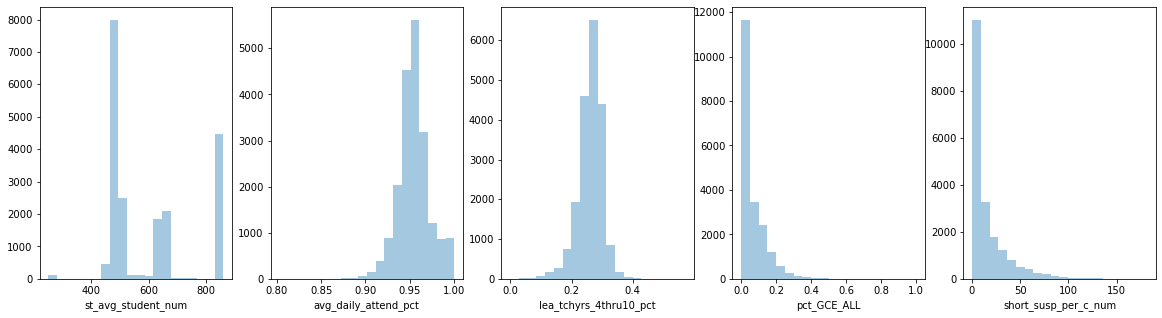

In [14]:
f, ax = plt.subplots(1,5,figsize=(20, 5))
sns.distplot(schoolData_X["st_avg_student_num"], bins=20, kde=False, ax=ax[0])
sns.distplot(schoolData_X["avg_daily_attend_pct"], bins=20, kde=False, ax=ax[1])
sns.distplot(schoolData_X["lea_tchyrs_4thru10_pct"], bins=20, kde=False, ax=ax[2])
sns.distplot(schoolData_X["pct_GCE_ALL"], bins=20, kde=False, ax=ax[3])
sns.distplot(schoolData_X["short_susp_per_c_num"], bins=20, kde=False, ax=ax[4])
plt.show()

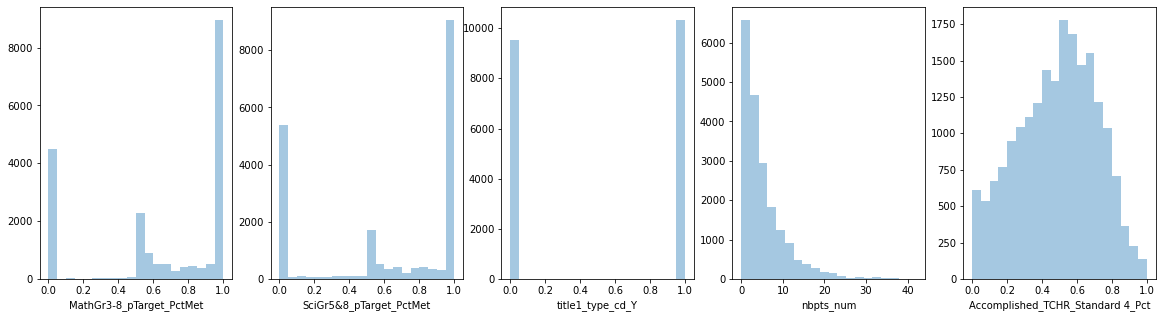

In [15]:
f, ax = plt.subplots(1,5,figsize=(20, 5))
sns.distplot(schoolData_X["MathGr3-8_pTarget_PctMet"], bins=20, kde=False, ax=ax[0])
sns.distplot(schoolData_X["SciGr5&8_pTarget_PctMet"], bins=20, kde=False, ax=ax[1])
sns.distplot(schoolData_X["title1_type_cd_Y"], bins=20, kde=False, ax=ax[2])
sns.distplot(schoolData_X["nbpts_num"], bins=20, kde=False, ax=ax[3])
sns.distplot(schoolData_X["Accomplished_TCHR_Standard 4_Pct"], bins=20, kde=False, ax=ax[4])
plt.show()

To further expand the category type for the math and science variables and confirm our decision to not include them, we ran box plots to represent outliers. For both variables high school is represented at zero (8th grade is not considered high school in any district in the dataset).

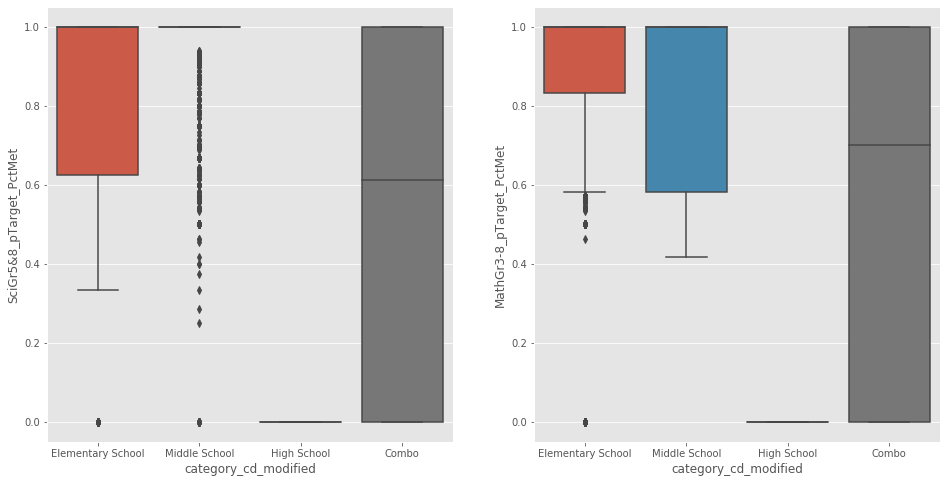

In [242]:
fig, axarr  = plt.subplots(1,2,figsize=(16,8))

#Science grade 
sns.boxplot(  y="SciGr5&8_pTarget_PctMet", x= "category_cd_modified", data=schoolData_org,
                orient='v' , ax=axarr[0],order=['Elementary School','Middle School','High School','Combo'])

#Math grade 
sns.boxplot(  y="MathGr3-8_pTarget_PctMet", x= "category_cd_modified", data=schoolData_org,
                orient='v' , ax=axarr[1],order=['Elementary School','Middle School','High School','Combo'])

We should exclude the variables "MathGr3-8_pTarget_PctMet","SciGr5&8_pTarget_PctMet".

In [16]:
schoolData_X_sub = schoolData_X[['short_susp_per_c_num','avg_daily_attend_pct','BlackMalePct','HispanicMalePct','pct_GCE_ALL','lea_flicensed_teach_pct','TotalTargets_pTarget_PctMet','nbpts_num' ]]
X = schoolData_X_sub

clf = RandomForestClassifier(n_estimators=150,random_state=1)

acc = cross_val_score(clf,X,y=y,cv=cv)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy =  76.74801931132212 +- 1.361605621524935


## Data Understanding - visualize the data <a name="data-understanding-2"></a>

With the group of 8 variables, we visualize individual variables and also crossplot them to get some understanding of their relationship with SPG Grade, our response variable for classification.

Some observations include:
- Short Suspension is lower and smaller range with high SPG Grade.
- Black and Hispanic male percentage are relatively lower with high SPG Grade.
- Nbpts Num are more spreaded out with high SPG Grade.
- Short suspension and attendence rate are anti-correlated with each other. Grade A is accumulated in lower right corner of the cross-plot.
- By multi-variables cross-plots a few variables such as short_susp_per_c_num, avg_daily_attend_pct, BlackMalePct can be observed to have some potentials to be seperated by clustering method.

We will apply cluster methods on this dataset in the next session.

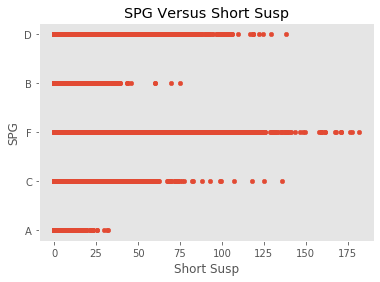

In [6]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")

%matplotlib inline

plt.scatter(X.short_susp_per_c_num.values, y.values.flatten(), 
             s=20)
plt.xlabel('Short Susp'), plt.ylabel('SPG')
plt.grid()
plt.title('SPG Versus Short Susp')
plt.show()

(Text(0.5, 0, 'Avg attend'), Text(0, 0.5, 'SPG'))

Text(0.5, 1.0, 'SPG Versus Avg attend')

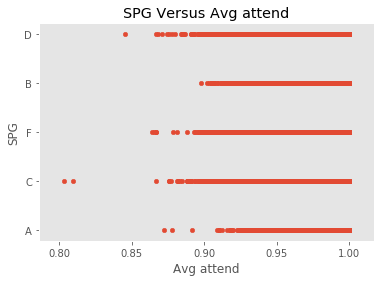

In [45]:
plt.scatter(X.avg_daily_attend_pct.values, y.values.flatten(), 
             s=20)
plt.xlabel('Avg attend'), plt.ylabel('SPG')
plt.grid()
plt.title('SPG Versus Avg attend')
plt.show()

(Text(0.5, 0, 'Black Male Pct'), Text(0, 0.5, 'SPG'))

Text(0.5, 1.0, 'SPG Versus Black Male Pct')

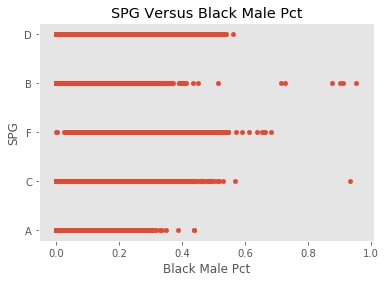

In [46]:
plt.scatter(X.BlackMalePct.values, y.values.flatten(), 
             s=20)
plt.xlabel('Black Male Pct'), plt.ylabel('SPG')
plt.grid()
plt.title('SPG Versus Black Male Pct')
plt.show()

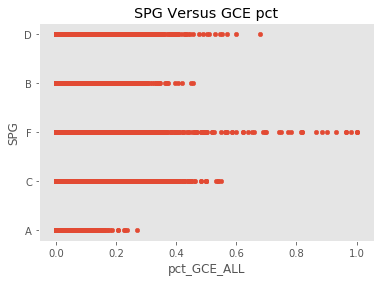

In [11]:
plt.scatter(X.pct_GCE_ALL.values, y.values.flatten(), 
             s=20)
plt.xlabel('pct_GCE_ALL'), plt.ylabel('SPG')
plt.grid()
plt.title('SPG Versus GCE pct')
plt.show()

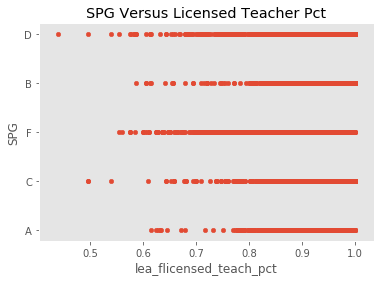

In [12]:
plt.scatter(X.lea_flicensed_teach_pct.values, y.values.flatten(), 
             s=20)
plt.xlabel('lea_flicensed_teach_pct'), plt.ylabel('SPG')
plt.grid()
plt.title('SPG Versus Licensed Teacher Pct')
plt.show()

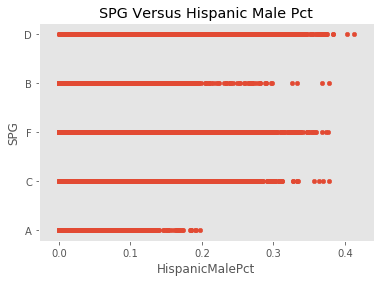

In [13]:
plt.scatter(X.HispanicMalePct.values, y.values.flatten(), 
             s=20)
plt.xlabel('HispanicMalePct'), plt.ylabel('SPG')
plt.grid()
plt.title('SPG Versus Hispanic Male Pct')
plt.show()

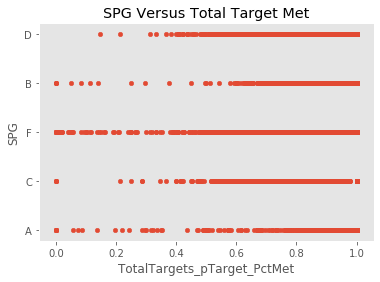

In [14]:
plt.scatter(X.TotalTargets_pTarget_PctMet.values, y.values.flatten(), 
             s=20)
plt.xlabel('TotalTargets_pTarget_PctMet'), plt.ylabel('SPG')
plt.grid()
plt.title('SPG Versus Total Target Met')
plt.show()

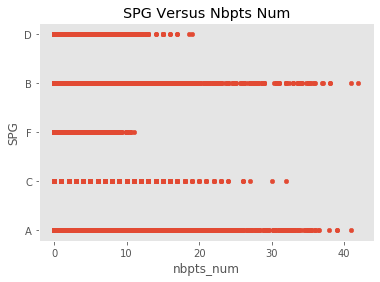

In [15]:
plt.scatter(X.nbpts_num.values, y.values.flatten(), 
             s=20)
plt.xlabel('nbpts_num'), plt.ylabel('SPG')
plt.grid()
plt.title('SPG Versus Nbpts Num')
plt.show()

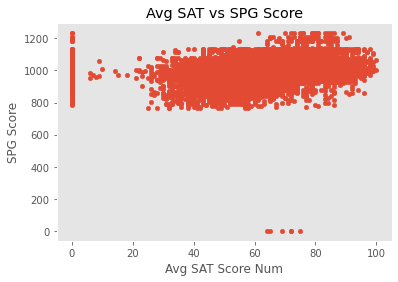

In [21]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")

%matplotlib inline
X1 = schoolData[['lea_sat_avg_score_num','SPG Score']].values

plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 1].shape)/2, 
             s=20)
plt.xlabel('Avg SAT Score Num'), plt.ylabel('SPG Score')
plt.grid()
plt.title('Avg SAT vs SPG Score')
plt.show()

We understand that the SPG Score is a continuous variable related to our response variable SPG Grade. In this plot, out of curiousity, we used SPG Score as our variable.

<Figure size 432x288 with 0 Axes>

(Text(0.5, 0, 'avg_daily_attend_pct'), Text(0, 0.5, 'short_susp_per_c_num'))

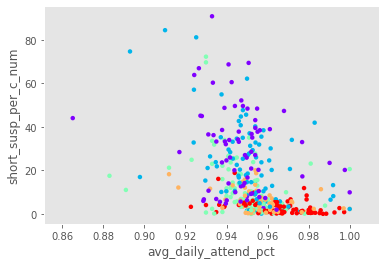

In [54]:
yy_fact = pd.factorize(plot_testY.T.squeeze())[0]
X1 = plot_test[['short_susp_per_c_num','avg_daily_attend_pct']]
X1=X1.values
plt.figure()
plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 0].shape)/2, c=yy_fact, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('avg_daily_attend_pct'), plt.ylabel('short_susp_per_c_num')
plt.grid()

<Figure size 432x288 with 0 Axes>

(Text(0.5, 0, 'BlackMalePct'), Text(0, 0.5, 'avg_daily_attend_pct'))

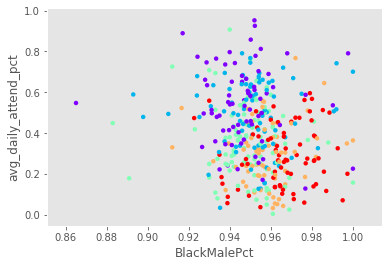

In [55]:
X1 = plot_test[['BlackMalePct','avg_daily_attend_pct']]
X1=X1.values
plt.figure()
plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 0].shape)/2, c=yy_fact, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('BlackMalePct'), plt.ylabel('avg_daily_attend_pct')
plt.grid()

In our two plots above we dive in to 4 variables to see what our clusters would look like. It isn't the perfect cluster as we have several overlap. But we can still distinguish them. With this analysis we can say cluster could be a viable predictive model.

In [17]:
plot_train=X.sample(frac=0.98,random_state=200) #random state is a seed value
plot_test=X.drop(plot_train.index)
plot_testY=y.drop(plot_train.index)
plot_testY.columns = ['SPG']

frames = [plot_test, plot_testY]
plot_comb = pd.concat(frames,axis=1)

To see all variables and how they cluster to our response variable, we generated a pairplot comparing each attribute. Using the legend we can we identify correlation among variables.  

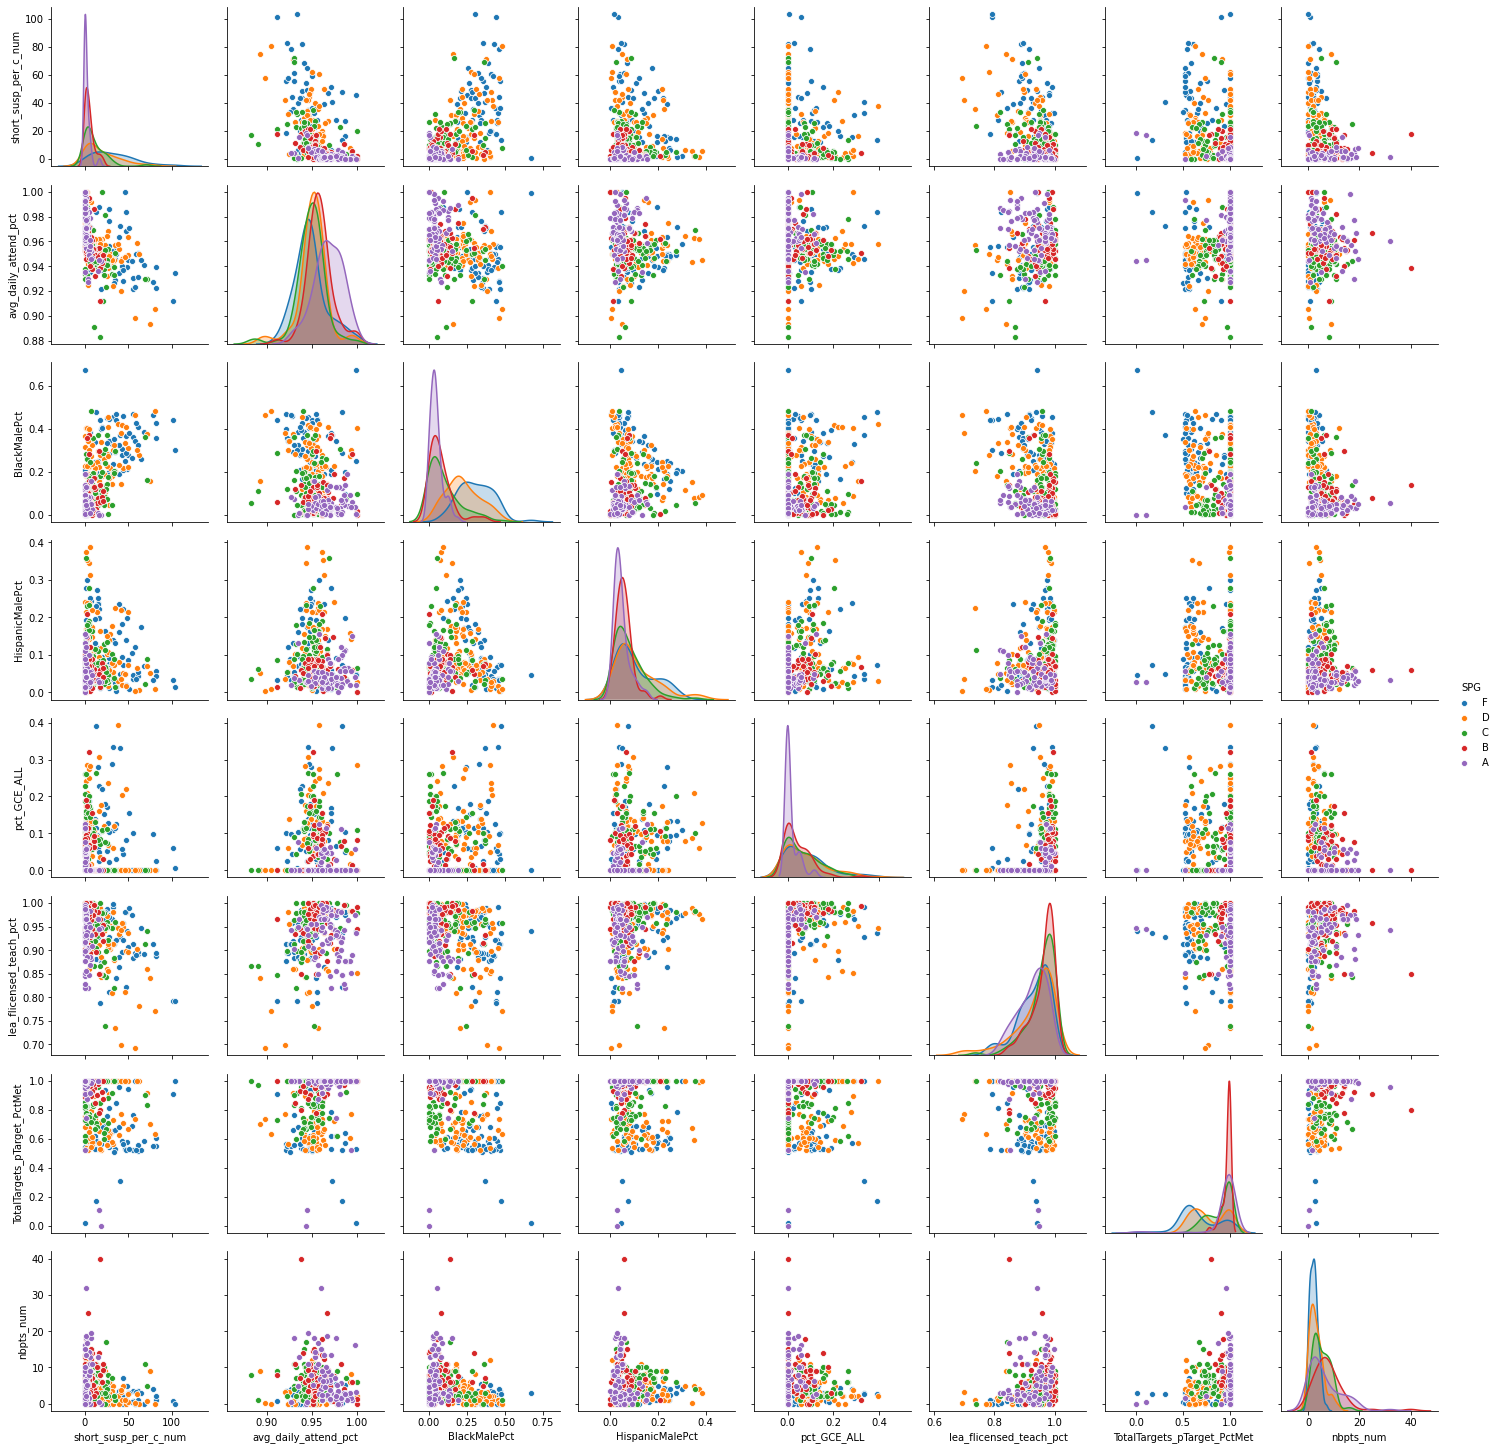

In [18]:
sns.pairplot(plot_comb, hue = "SPG")

Exploring the two race variables there are interesting findings. For short term suspension, the dispersion of hispanic males is more concentrated than black males. Another interesting comparison is the two race variables compared to teachers that meet the North Carolina fully licensed definition. Hispanic males have more students that benefit from licensed teachers than those of black male students.

## Models and Evaluations - Clustering <a name="model-evaluation"></a>
With our baseline established above using original variables, in the following sessions we will:
- Utilize 5 cluster methods on the dataset.
- Optimized the clustering parameters by examining if the generated label can help us to raise the classification accuracy score.
- Visualize the clusters.
- Deterimine the best cluster model to use and re-run the classification grid search for final model.

### Training and Parameters

### KMeans

In [103]:
X.shape

(19865, 16)

In [102]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

#Xorg = schoolData_X[['short_susp_per_c_num','avg_daily_attend_pct','BlackMalePct','HispanicMalePct','pct_GCE_ALL','lea_flicensed_teach_pct','TotalTargets_pTarget_PctMet','nbpts_num' ]]
#X=Xorg

cls = KMeans(n_clusters=8, init='k-means++',random_state=1)
cls.fit(X)
newfeature = cls.labels_ # the labels from kmeans clustering

X = np.column_stack((X,pd.get_dummies(newfeature)))

acc = cross_val_score(clf,X,y=y,cv=cv)

print ("Average accuracy (with kmeans for class/fare)= ", acc.mean()*100, "+-", acc.std()*100)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

Average accuracy (with kmeans for class/fare)=  76.22952196876604 +- 0.8785350553659526


In [243]:
%%time 

X=Xorg

params = []
for n_fare in range(4,10):
        X=Xorg
        # get the first clustering
        cls_fare = KMeans(n_clusters=n_fare, init='k-means++',random_state=1)
        cls_fare.fit(X)
        newfeature_fare = cls_fare.labels_ # the labels from kmeans clustering

        X = np.column_stack((X,pd.get_dummies(newfeature_fare)))

        acc = cross_val_score(clf,X,y=y,cv=cv)
        params.append((n_fare,acc.mean()*100,acc.std()*100)) # save state

        print ("Clusters",n_fare,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Clusters 4 Average accuracy =  76.28993504326745 +- 0.9466100470201975
Clusters 5 Average accuracy =  76.39566305544535 +- 0.8332050862989009
Clusters 6 Average accuracy =  76.45102643838167 +- 0.8467448998191849
Clusters 7 Average accuracy =  76.34028142610771 +- 0.6021850665720532
Clusters 8 Average accuracy =  76.22952196876604 +- 0.8785350553659526
Clusters 9 Average accuracy =  76.22449736600272 +- 0.7998460462386866
Wall time: 2min 10s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

<Figure size 432x288 with 0 Axes>

(Text(0.5, 0, 'short_susp_per_c_num'), Text(0, 0.5, 'avg_daily_attend_pct'))

(Text(0.5, 0, 'short_susp_per_c_num'), Text(0, 0.5, 'BlackMalePct'))

<Figure size 432x288 with 0 Axes>

(Text(0.5, 0, 'avg_daily_attend_pct'), Text(0, 0.5, 'BlackMalePct'))

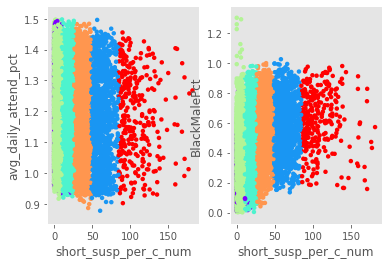

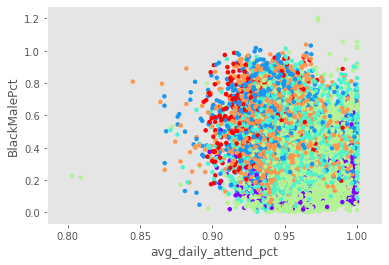

In [244]:
n_fare=6

cls_fare = KMeans(n_clusters=n_fare, init='k-means++',random_state=1)
cls_fare.fit(X)
newfeature_fare = cls_fare.labels_ # the labels from kmeans clustering

plt.figure()
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1]+np.random.random(X[:, 1].shape)/2, c=newfeature_fare, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('short_susp_per_c_num'), plt.ylabel('avg_daily_attend_pct')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 2]+np.random.random(X[:, 2].shape)/2, c=newfeature_fare, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('short_susp_per_c_num'), plt.ylabel('BlackMalePct')
plt.grid()

plt.figure()
plt.scatter(X[:, 1], X[:, 2]+np.random.random(X[:, 2].shape)/2, c=newfeature_fare, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('avg_daily_attend_pct'), plt.ylabel('BlackMalePct')
plt.grid()

Best Kmeans parameter is Clusters 6  with the highest accuracy produced.

In [250]:
%%time 

X1 = schoolData_X[['short_susp_per_c_num','avg_daily_attend_pct']]
X2 = schoolData_X[['pct_GCE_ALL','lea_flicensed_teach_pct','BlackMalePct']]

params = []
for n_fare in range(2,8):
    for n_fam in range(8,14,2):
        X=Xorg
        # get the first clustering
        cls_fare = KMeans(n_clusters=n_fare, init='k-means++',random_state=1)
        cls_fare.fit(X1)
        newfeature_fare = cls_fare.labels_ # the labels from kmeans clustering

        # append on the second clustering
        cls_fam = KMeans(n_clusters=n_fam, init='k-means++',random_state=1)
        cls_fam.fit(X2)
        newfeature_fam = cls_fam.labels_ # the labels from kmeans clustering

        X = np.column_stack((X,pd.get_dummies(newfeature_fare),pd.get_dummies(newfeature_fam)))

        acc = cross_val_score(clf,X,y=y,cv=cv)
        params.append((n_fare,n_fam,acc.mean()*100,acc.std()*100)) # save state

        print ("Clusters",n_fare,n_fam,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Clusters 2 8 Average accuracy =  75.96273069134261 +- 0.9820058577283621
Clusters 2 10 Average accuracy =  76.12382132619011 +- 0.7854171755850958
Clusters 2 12 Average accuracy =  76.28993580353418 +- 0.8329662717061889
Clusters 3 8 Average accuracy =  76.13890121661377 +- 1.0153280521017085
Clusters 3 10 Average accuracy =  76.05333091629338 +- 1.0629452835685587
Clusters 3 12 Average accuracy =  76.19429044861864 +- 0.7915337200781525
Clusters 4 8 Average accuracy =  76.20939314704395 +- 0.7361784257338517
Clusters 4 10 Average accuracy =  76.50638982131802 +- 0.9069373148308243
Clusters 4 12 Average accuracy =  76.47118110917228 +- 0.7090356307902533
Clusters 5 8 Average accuracy =  76.03824114240231 +- 0.8544100318807449
Clusters 5 10 Average accuracy =  76.19430185261947 +- 0.5356687380781241
Clusters 5 12 Average accuracy =  76.29497637189863 +- 0.7093795972179253
Clusters 6 8 Average accuracy =  75.99294369086046 +- 0.7986123203949674
Clusters 6 10 Average accuracy =  76.229551

Above another experiment is conducted by not using all 8 variables but break into two groups for cluster modeling. The resulted accuracy are not as good as previous work. We ignore this attempt and stick to original Kmeans variable and parameter choice. 

### Agglomerative Clustering

In [246]:
%%time 

from sklearn.cluster import AgglomerativeClustering

X = Xorg

params = []
for link in ['ward', 'complete', 'average']:
    for n_fam in range(3,8):
        X=Xorg
        # append on the clustering
        cls_fam = AgglomerativeClustering(n_clusters=n_fam, linkage=link)
        cls_fam.fit(X)
        newfeature_fam = cls_fam.labels_ # the labels from kmeans clustering

        X = np.column_stack((X,pd.get_dummies(newfeature_fam)))

        acc = cross_val_score(clf,X,y=y,cv=cv)
        params.append((n_fare,n_fam,acc.mean()*100,acc.std()*100)) # save state

        print ("C=",n_fam,link,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

C= 3 ward Average accuracy =  76.52654221130844 +- 0.9340024219810111
C= 4 ward Average accuracy =  76.4057282265731 +- 0.8452708392855292
C= 5 ward Average accuracy =  76.40069906220947 +- 0.6828550475307295
C= 6 ward Average accuracy =  76.56178285465649 +- 0.6300230258897825
C= 7 ward Average accuracy =  76.23457470139803 +- 0.8229856104786428
C= 3 complete Average accuracy =  76.57686958748063 +- 1.0096105801668542
C= 4 complete Average accuracy =  76.60706434059718 +- 1.0490414576348104
C= 5 complete Average accuracy =  76.47619202713459 +- 1.141671916304717
C= 6 complete Average accuracy =  76.65238688094084 +- 0.8711891020158551
C= 7 complete Average accuracy =  76.51143571154951 +- 0.596131673094658
C= 3 average Average accuracy =  76.62720380605333 +- 0.8947394050570273
C= 4 average Average accuracy =  76.35536815893187 +- 1.1508733240465652
C= 5 average Average accuracy =  76.49632693099043 +- 1.1456810964199153
C= 6 average Average accuracy =  76.44095062351983 +- 1.07485348

Best Agglomerative clustering parameter is Clusters 6 and link 'complete' with the highest accuracy produced.

### DBSCAN

In [247]:
%%time 

X = Xorg

from sklearn.cluster import DBSCAN

params = []
for eps in [0.1, 0.125, 0.15]:
    for mpts in range(5,8):
        X = Xorg
        # append on the clustering
        cls_fam = DBSCAN(eps=eps, min_samples=mpts)
        cls_fam.fit(X)
        newfeature_fam = cls_fam.labels_ # the labels from kmeans clustering

        X = np.column_stack((X,pd.get_dummies(newfeature_fam)))

        acc = cross_val_score(clf,X,y=y,cv=cv)
        params.append((n_fare,n_fam,acc.mean()*100,acc.std()*100)) # save state

        print (eps,mpts,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

0.1 5 Average accuracy =  76.36543485059306 +- 1.073084612350608
0.1 6 Average accuracy =  76.40067093234077 +- 1.0782363140170594
0.1 7 Average accuracy =  76.5567377246917 +- 1.003496610200417
0.125 5 Average accuracy =  76.13890805901427 +- 0.8231233048000587
0.125 6 Average accuracy =  76.03320969723852 +- 1.073892903871635
0.125 7 Average accuracy =  76.0784942242461 +- 0.8898680571642132
0.15 5 Average accuracy =  75.74124142706138 +- 0.5977461723418712
0.15 6 Average accuracy =  75.95768784217799 +- 0.8022711439503964
0.15 7 Average accuracy =  76.06338088208669 +- 1.0311973143329831
Wall time: 4min 1s


Best DBSCAN parameter is eps 0.1 and mpts 7 with the highest accuracy produced.

### Gaussian Mixture

In [80]:
X = schoolData_X[['short_susp_per_c_num','avg_daily_attend_pct','BlackMalePct','HispanicMalePct','pct_GCE_ALL','lea_flicensed_teach_pct','TotalTargets_pTarget_PctMet','nbpts_num' ]]
#X = Xorg

In [249]:
# this code has been manipulated from the source available on sklearn's website documentation
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

X = Xorg


lowest_bic = np.infty
bic = []
n_components_range = range(3, 8)
cv_types = ['spherical', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm


GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=7, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=7, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=7, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

<Figure size 720x288 with 0 Axes>

([<matplotlib.axis.XTick at 0x20279969a08>,
 <a list of 5 Text xticklabel objects>)

(-240223.88799982623, 805681.5172382661)

Text(0.5, 1.0, 'BIC score per model')

Text(6.8, -198801.89175277308, '*')

Text(0.5, 0, 'Number of components')

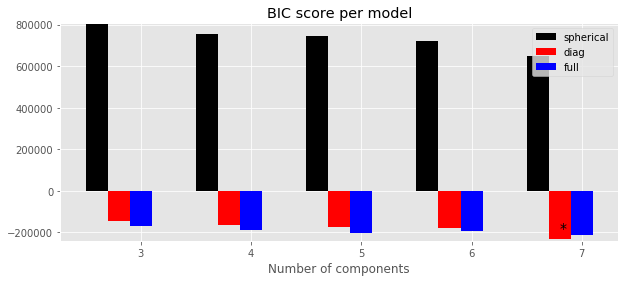

In [252]:
# this code has been manipulated from the source available on sklearn's website documentation
# plot the BIC
bic = np.array(bic)
color_iter = itertools.cycle(['k', 'r', 'b', 'g', 'c', 'm', 'y'])
clf = best_gmm
bars = []

plt.figure(figsize=(10,4))
spl = plt.subplot(1,1,1)
# Plot the BIC scores
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')

xpos = np.min(n_components_range)-0.4 + np.mod(bic.argmin(), len(n_components_range)) +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

plt.show()

In [253]:
best_gmm

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=7, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

Best Gaussian Mixture model parameter is covariance type of 'diag' with 7 components with the lowest BIC score.

In [254]:
X = Xorg
cls_fam = best_gmm
Y_ = cls_fam.predict(X)
Y_
X = np.column_stack((X,pd.get_dummies(Y_)))

clf = RandomForestClassifier(n_estimators=150,random_state=1)
acc = cross_val_score(clf,X,y=y,cv=cv)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

array([1, 6, 3, ..., 3, 3, 0], dtype=int64)

Average accuracy =  75.4240954038638 +- 0.7322646883416103


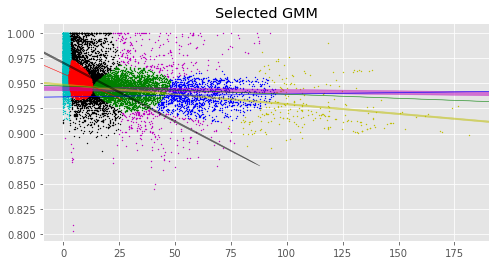

Wall time: 149 ms


In [52]:
%%time 

# this code has been manipulated from the source available on sklearn's website documentation
# Plot the winner
plt.figure(figsize=(8,4))
splot = plt.subplot(1,1,1)
Y_ = clf.predict(X1)
for i, (mean, covar, color) in enumerate(zip(clf.means_, clf.covariances_,
                                             color_iter)):
    if len(covar.shape)<2:
        tmp = np.zeros((2,2))
        np.fill_diagonal(tmp,covar)
        covar = tmp
    elif covar.shape[0] != covar.shape[1]:
        covar = np.diag(covar)
        
    v, w = linalg.eigh(covar)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X1[Y_ == i, 0], X1[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180 * angle / np.pi  # convert to degrees
    v *= 4
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)


plt.title('Selected GMM')
plt.show()

### Spectral Clustering

In [122]:
# an example using SpectralClustering, which assumes that the graphical data needs to be calculated from the structure
from sklearn.cluster import SpectralClustering

X = Xorg

nclust = 10

# If a string, this may be one of 
#  ‘nearest_neighbors’, ‘precomputed’, ‘rbf’ 
#  or one of the kernels supported by sklearn.metrics.pairwise_kernels
spc = SpectralClustering(n_clusters=nclust, affinity = 'nearest_neighbors')
labels = spc.fit_predict(X)


In [130]:
X = Xorg
clf = RandomForestClassifier(n_estimators=150,random_state=1)

params = []
#aff = ['nearest_neighbors', 'rbf']
aff = ['nearest_neighbors']
for nclust in range(6,12):
    for aff_type in aff:
        
        X = Xorg
        # append on the clustering
        spc = SpectralClustering(n_clusters=nclust, affinity = aff_type)
        labels = spc.fit_predict(X)

        X = np.column_stack((X,pd.get_dummies(labels)))

        acc = cross_val_score(clf,X,y=y,cv=cv)
        params.append((nclust,acc.mean()*100,acc.std()*100)) # save state

        print (nclust,aff_type,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

6 nearest_neighbors Average accuracy =  76.37551522705525 +- 0.6251372432704223
7 nearest_neighbors Average accuracy =  76.3201442414517 +- 0.8238383357003491
8 nearest_neighbors Average accuracy =  76.10871558669791 +- 0.9244948085486766
9 nearest_neighbors Average accuracy =  76.3956501309111 +- 0.7774299084994601
10 nearest_neighbors Average accuracy =  76.26478770091587 +- 1.0603990711058788
11 nearest_neighbors Average accuracy =  76.27484222830952 +- 0.6019161678191045


Best Spectral Clustering model parameter is 9 clusters with affinity 'nearest_neighbors' that get the highest accuracy produced.

### Evaluate and Compare <a name="model-evaluation-2"></a>

In [256]:
X = Xorg

##Best Kmeans Model
n_fare=6

cls_fare = KMeans(n_clusters=n_fare, init='k-means++',random_state=1)
cls_fare.fit(X)
kmeans_fare = cls_fare.labels_ # the labels from kmeans clustering

##Best Agglomerative Clustering Model
cls_fam = AgglomerativeClustering(n_clusters=6, linkage='complete')
cls_fam.fit(X)
agg_fam = cls_fam.labels_ 

##Best DBSCAN Model
cls_fam = DBSCAN(eps=0.1, min_samples=7)
cls_fam.fit(X)
dbscan_fam = cls_fam.labels_ 

##Best Gaussian Mixture Model
cls_fam = best_gmm
GM_labels = cls_fam.predict(X)

##Best Spectral Clustering Model
spc = SpectralClustering(n_clusters=9, affinity = 'nearest_neighbors')
labels = spc.fit_predict(X)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=6)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=7, n_jobs=None, p=None)

| Method | Accuracy Score | Std Dev |
|:---|:---|:---|
| K-Means | 76.45 | +- 0.85 |
| Agglomerative | 76.65 | +- 0.87 |
| DBScan | 76.56 | +- 1.00 |
| Gaussian Mix | 75.42 | +- .73 |
| Spectral | 76.39 | +- .77 |

From the training and parameter optimization above, we've come up with best parameter choices for all 5 methods. An accuracy check is conducted across 5 methods and we have observed:
- Of all 5 method, Agglomerative Clustering Model get the highest accuracy score.
- The first three methods (Kmeans, Agglomerative Clustering and DBSCAN) get relatively higher accuracy than the left two method.
- Compared to baseline, we don't observe obvious lift of accuracy with those labels added.


### Cluster Visualization <a name="model-evaluation-3"></a>

Visualization efforts has been conducted on the clustering results of all 5 methods and plotted out in two ways:
- Using the two most important features "short_susp_per_c_num" and "avg_daily_attend_pct" as two axis labels.
- Conduct a PCA study and utilize the first two principle axis to plot out the clusters.

As shown below, we can see that different methods are clustering data points in different ways.
- The number of optimized clusters are different: Kmeans/Agglomerative has 6 and Spectral has 9.
- The clustering criteria is different. For Kmeans/Agglomerative/Spectral the variable "short_susp_per_c_num" is relied heavily on to define the clusters. It is not the case in the rest two methods.
- With the PCA axis plot, the clusters are more clearly reflected. Variables that dominated PCA2 are also used in Kmeans/Spectral to define the cluster and it doesn't seems to be used in Agglomerative. For the rest two methods, neither PCA1 or PCA2 are heavily rely on to do cluster. This reflect the inherit differences of the cluster methods.

<Figure size 432x288 with 0 Axes>

(Text(0.5, 0, 'avg_daily_attend_pct'), Text(0, 0.5, 'short_susp_per_c_num'))

<Figure size 432x288 with 0 Axes>

(Text(0.5, 0, 'avg_daily_attend_pct'), Text(0, 0.5, 'short_susp_per_c_num'))

<Figure size 432x288 with 0 Axes>

(Text(0.5, 0, 'avg_daily_attend_pct'), Text(0, 0.5, 'short_susp_per_c_num'))

<Figure size 432x288 with 0 Axes>

(Text(0.5, 0, 'avg_daily_attend_pct'), Text(0, 0.5, 'short_susp_per_c_num'))

<Figure size 432x288 with 0 Axes>

(Text(0.5, 0, 'avg_daily_attend_pct'), Text(0, 0.5, 'short_susp_per_c_num'))

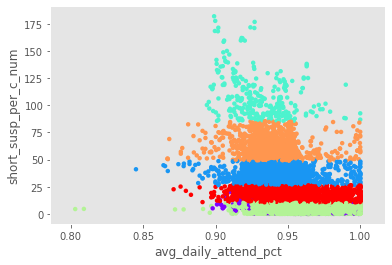

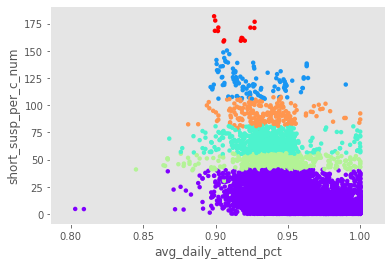

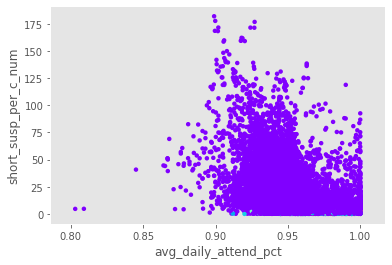

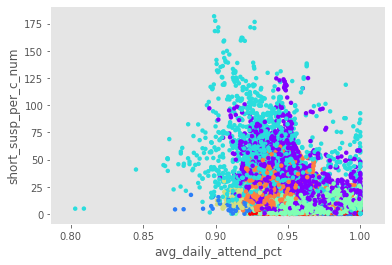

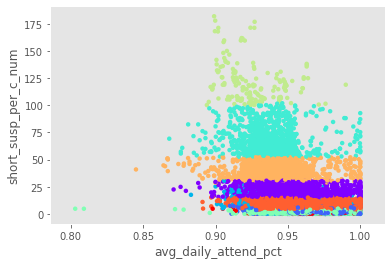

In [278]:
X=Xorg.values
lab_option = [kmeans_fare,agg_fam,dbscan_fam,GM_labels,labels]

for lab in lab_option:
 
    plt.figure()
    plt.scatter(X[:, 1], X[:, 0]+np.random.random(X[:, 0].shape)/2, c=lab, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('avg_daily_attend_pct'), plt.ylabel('short_susp_per_c_num')
    plt.grid()

<Figure size 432x288 with 0 Axes>

(Text(0.5, 0, 'PCA1'), Text(0, 0.5, 'PCA2'))

<Figure size 432x288 with 0 Axes>

(Text(0.5, 0, 'PCA1'), Text(0, 0.5, 'PCA2'))

<Figure size 432x288 with 0 Axes>

(Text(0.5, 0, 'PCA1'), Text(0, 0.5, 'PCA2'))

<Figure size 432x288 with 0 Axes>

(Text(0.5, 0, 'PCA1'), Text(0, 0.5, 'PCA2'))

<Figure size 432x288 with 0 Axes>

(Text(0.5, 0, 'PCA1'), Text(0, 0.5, 'PCA2'))

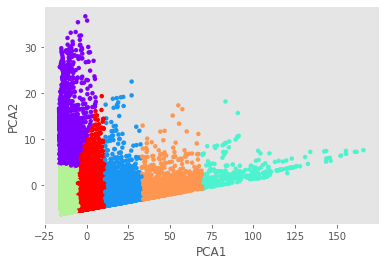

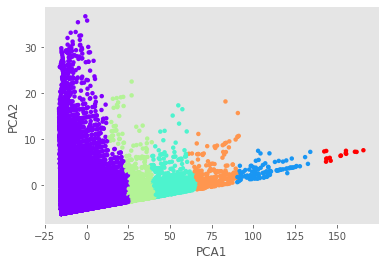

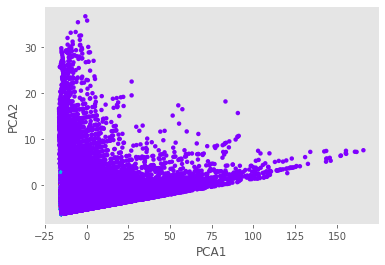

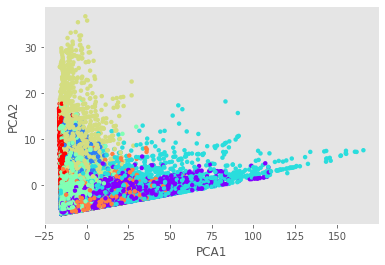

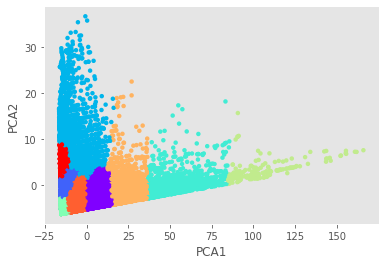

In [272]:
from sklearn.decomposition import PCA
PCA_subset = PCA(n_components=2)
PC_subset = PCA_subset.fit_transform(X)
PC_DFsubset = pd.DataFrame(data = PC_subset, columns = ['PCA1', 'PCA2'])

for lab in lab_option:
    
    plt.figure()
    plt.scatter(PC_DFsubset.PCA1, PC_DFsubset.PCA2, c=lab, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('PCA1'), plt.ylabel('PCA2')
    plt.grid()
    

In [261]:
## Try to combine multiple labels into the model
X = Xorg
lab_option = [agg_fam,dbscan_fam]

for lab in lab_option:
    X = np.column_stack((X,pd.get_dummies(lab)))

    clf = RandomForestClassifier(n_estimators=150,random_state=1)
    acc = cross_val_score(clf,X,y=y,cv=cv)

    print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy =  76.65238688094084 +- 0.8711891020158551
Average accuracy =  76.23455569472998 +- 1.2052712955637872


An effort has been conducted to try to add labels generated from multiple methods attempting to raise the accuracy score.

As shown we are using the labels generated from both Agglomerative and DBSCAN but the resulted accuracy 76.2% is lower than just using Agglomerative.

So we didn't proceed with this effort. 

To continue we choose the labels generated from Agglomerative as our clustering model choice.

### Classification Model Refitting

A classification model re-fitting is done below with Agglomerative label added to the original variable list. 

To get best accuracy score we re-conduct a grid search to optimize the parameters of random forest as shown below.

After it to compare the two models ROC curves are generated with the model before and after adding the labels.

In [263]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 
#Training using Oversample Method
X = Xorg
Xlab = np.column_stack((X,pd.get_dummies(agg_fam)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Xlab_train, Xlab_test, y_train, y_test = train_test_split(Xlab, y, test_size=0.2, random_state=42)

In [255]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_rf = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

#Have to do random search since grid search takes forever
grid_rf = RandomizedSearchCV(RandomForestClassifier(), param_grid_rf, refit=True, verbose=2, n_jobs=-1)
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 14.2min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [259]:
#Print the parameterization of the best estimator
grid_rf.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=60, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [280]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

rf_mod = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=60, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

rf_mod1 = rf_mod.fit(X_train, y_train)

pred_rf = rf_mod1.predict(X_test)

print(accuracy_score(y_test, pred_rf))
print(precision_score(y_test, pred_rf, average='weighted'))
print(recall_score(y_test, pred_rf, average='weighted'))
print(confusion_matrix(y_test, pred_rf))

0.8238107223760383
0.8206180971342719
0.8238107223760383
[[749  31   1   0   0]
 [ 54 630 122  13   1]
 [  6 131 507 114   8]
 [  2  11  90 660  77]
 [  0   0   2  37 727]]


In [285]:
#Have to do random search since grid search takes forever
grid_rflab = RandomizedSearchCV(RandomForestClassifier(), param_grid_rf, refit=True, verbose=2, n_jobs=-1)
grid_rflab.fit(Xlab_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 23.5min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [286]:
#Print the parameterization of the best estimator
grid_rflab.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [288]:
rf_mod2 = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=60, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

rf_mod2.fit(Xlab_train, y_train)

pred_rflab = rf_mod2.predict(Xlab_test)

print(accuracy_score(y_test, pred_rflab))
print(precision_score(y_test, pred_rflab, average='weighted'))
print(recall_score(y_test, pred_rflab, average='weighted'))
print(confusion_matrix(y_test, pred_rflab))

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=60, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

0.8255726151522779
0.8221638167746868
0.8255726151522779
[[752  29   0   0   0]
 [ 59 626 121  14   0]
 [  6 139 503 111   7]
 [  2  10  89 672  67]
 [  0   0   1  38 727]]


The accuracy, precision and recall are all looked at in the above comparison. 

We observed that the baseline accuracy (82.3%) has been slightly raised (82.5%). Slight increases are also observed for the precision and recall scores.

In [289]:
# Probability Matrix
yhat_score_rf = rf_mod1.predict_proba(X_test)
yhat_score_rf

# Probability Matrix
yhat_score_rflab = rf_mod2.predict_proba(Xlab_test)
yhat_score_rflab

array([[0.    , 0.    , 0.0875, 0.085 , 0.8275],
       [0.    , 0.    , 0.1625, 0.785 , 0.0525],
       [0.    , 0.    , 0.    , 0.01  , 0.99  ],
       ...,
       [0.0025, 0.015 , 0.1625, 0.7375, 0.0825],
       [0.    , 0.    , 0.0075, 0.0175, 0.975 ],
       [0.0025, 0.0575, 0.23  , 0.4125, 0.2975]])

array([[0.    , 0.    , 0.115 , 0.08  , 0.805 ],
       [0.    , 0.    , 0.1475, 0.8   , 0.0525],
       [0.    , 0.    , 0.    , 0.    , 1.    ],
       ...,
       [0.    , 0.0225, 0.165 , 0.715 , 0.0975],
       [0.    , 0.    , 0.005 , 0.005 , 0.99  ],
       [0.    , 0.04  , 0.2625, 0.3975, 0.3   ]])

In [183]:
from sklearn.preprocessing import label_binarize
one_hot_class_encoding = label_binarize(y_test,np.unique(y_test))
one_hot_class_encoding

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0]])

In [179]:
one_hot_class_encoding.shape

(19865, 5)

In [181]:
def PlotROC_All(y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr["micro"], tpr["micro"], _ = mt.roc_curve(one_hot_class_encoding.ravel(), y_score.ravel())
    roc_auc["micro"] = mt.auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(12,4))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]))
    return roc_auc["micro"]

0.9711581522875687

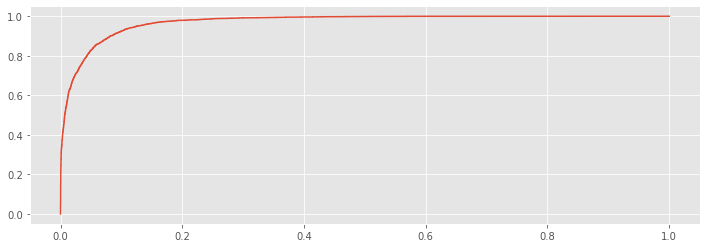

In [184]:
PlotROC_All(yhat_score_rf)

In [290]:
from sklearn import metrics as mt

#Separate ROC curves for different classifiers
fpr_rf, tpr_rf, _ = mt.roc_curve(one_hot_class_encoding.ravel(), yhat_score_rf.ravel())
roc_auc_rf = mt.auc(fpr_rf, tpr_rf)

#Separate ROC curves for different classifiers
fpr_rflab, tpr_rflab, _ = mt.roc_curve(one_hot_class_encoding.ravel(), yhat_score_rflab.ravel())
roc_auc_rflab = mt.auc(fpr_rflab, tpr_rflab)


<Figure size 1152x648 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic for cardio = 0')

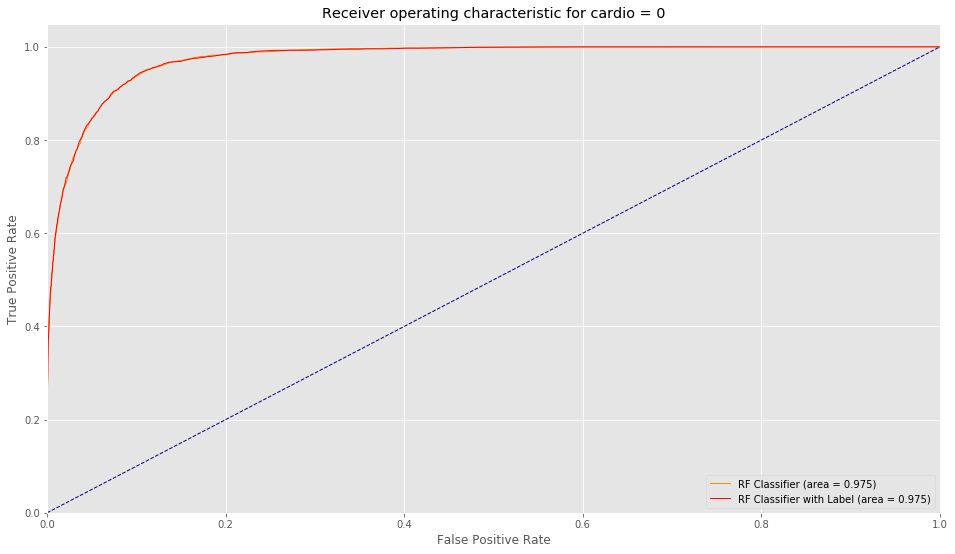

In [291]:
plt.figure(figsize=(16,9));
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=1, label='RF Classifier (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_rflab, tpr_rflab, color='red', lw=1, label='RF Classifier with Label (area = %0.3f)' % roc_auc_rflab)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for cardio = 0')
plt.legend(loc="lower right")
plt.show()

Furthermore we evaluate the two models by their ROC curves. Reflect above we cannot tell differences from those two models.

This indicate that the labels generated from clustering model has maginal effects on the classification model fitting in this particular case.

### Summary <a name="model-evaluation-4"></a>

A series of clustering methods are conducted on a group of important features that are used to do a classification modeling of SPG score. 

The parameters are optimized by best accuacy score when the generated labels are added back to do classification. With visualization we can conclude that "short_susp_per_c_num" and "npts_num" are the main variables that a few cluster methods rely on.

We also obeserved that with best parameter choices of 5 method, the best accuracy score reached are just slightly above or below the baseline score, which indicate that the labels'help to classification is mariginal.

We did a parameter optimization for the classification model using the dataset before and after labels are added and did a comparison. Although the model with label added has a minor uplift for accuracy, precision and recall score, when we are plotting a ROC curve for a comparison we can not observe the differences.

In conclusion, with the subgroup of 8 variables we can already construct a good-quality classification model. By adding labels generated from clustering labels, we do not observe an obvious uplift on the model quality.

## Deployment <a name="deployment"></a>
Our model is useful for school districts that are evaluating and measuring schools in their respective areas. It should be important to the district representatives to understand the statistics behind the scores of these schools, what drives the school’s scoring and where to make policy changes. The model can also be an important factor in real estate. Homebuyers with children may consider a school’s “health” as a factor on purchasing a home in a particular area or school district.

The model's effectiveness can be measured by possibly being used in new and existing neighborhoods, parks and recreation, and commercial zoning to assist in economic development.

District leadership can present to city councils, PTA (Parent Teacher Association) and other organizations the model with proven accuracy and the indicators to focus on or where improvements can be made.

As new neighborhoods are being built, schools also are built to support the enrollment need. School zones and boundaries will change and it is suggested that the model is evaluated annually and modified on an “as needed" basis. We can make improvements to ensure the model remains effective going forward.

## Exceptional Work <a name="exceptional-work"></a>

In [2]:
from IPython.display import Image

### Association Rule Mining

Using trends discovered in previous analyses, we ran association rule mining algorithms using the 'arules' package in R to see if we could gain any insights into potential causal relationships in the data. In order to do this, we took the simplest approach possible:

* For each explanatory variable of interest (listed below), we classified the observation as 'low' if it was below the median value, or 'high' if it was above the median value. 
* The response variable, SPG.Grade, was re-classified as 'Good' if the school's grade was an A or a B, 'Moderate' if the school's grade was a C, or 'Bad' if the school's grade was a D or an F.

The list of our explanatory variables are as follows:

* Black Male Ratio - Was the ratio of black males above the median value for all schools (0.09)?
* Hispanic Male Ratio - Was the ratio of hispanic males above the median value for all schools (0.06)?
* Short Suspensions Rank - Was the number of short suspensions above the median value for all schools (7.19)?
* Daily Attendance Rank - Was the daily attendance percentage above the median value for all schools (0.95)?
* InexperiencedTeachRatio - Was the ratio of teachers with 0-3 years of experience above the median value for all schools (0.21)?
* schoolSizeRank - Was the size of the student body above the median value for all schools (535)?
* SPG.Grade - The modified SPG.Grade (see above)

We recognize that our approach may be somewhat biased, as the median value for some of these variables may not represent a true median (for example, the median racial composition in urban areas vs. rural areas likely varies tremendously. Furthermore, calling attendance under 95% 'low' might be somewhat harsh, as values such as 93% or 94% are still pretty good, practically speaking). Nevertheless, the trends shown below are still interesting and seem to align with results from previous analyses. Below is what our data looked like.

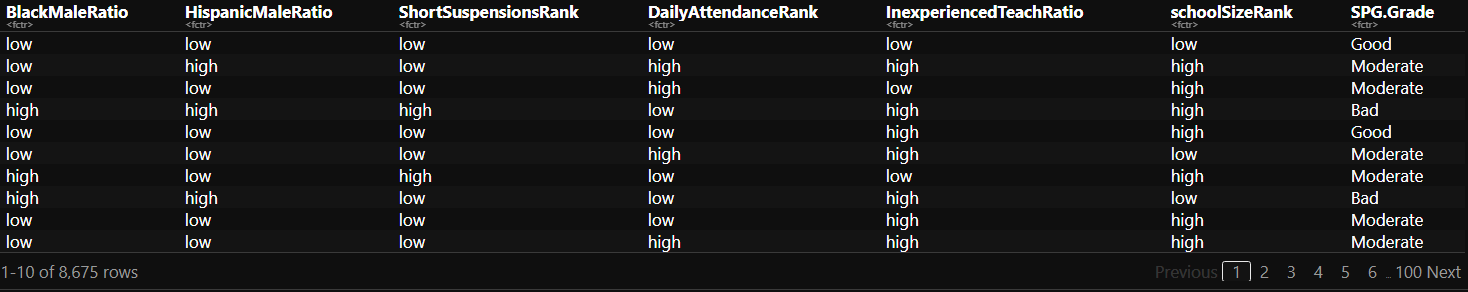

In [4]:
Image("img/data_raw.png")

And here is the code used to generate the association rules:

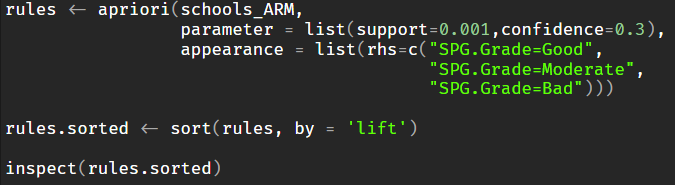

In [6]:
Image("img/code.png")

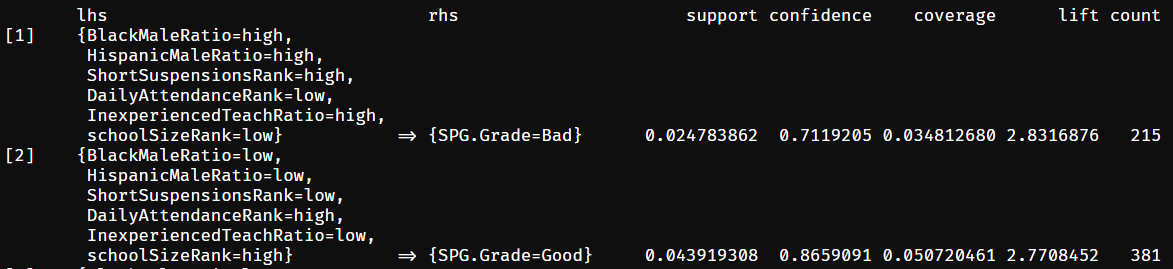

In [5]:
Image("img/rules.png")

The first two rules are striking. Taking them at face value, one might conclude that less diversity, coupled with improvements in teacher experience, suspensions, and attendance would improve school performance. But is that really the case? These results motivated us to dig a little bit deeper and see if schools with highly diverse populations are improved to performance levels of less diverse schools when attendance, suspension rates, and teacher experience are improved. 

To accomplish this, we aggregated the data in a similar fashion to "matching" techniques used in clinical trials (https://en.wikipedia.org/wiki/Matching_(statistics)). That is, we grouped schools with similar features and looked at the composition of school performance. We then looked at another group of schools with exactly the same features as the first, but with one different aspect (better attendance, lower suspension rate, etc.), and compared the performance composition. The analyses were run separately for small and large schools. The comparison groups are as follows:

#### Control Group

* Black Male Ratio = 'high'
* Hispanic Male Ratio = 'high' 
* Short Suspension Rank = 'high'
* Daily Attendance Rank = 'low'
* Inexperienced Teacher Ratio = 'high'

#### Increased Teacher Experience Only Group

* Black Male Ratio = 'high'
* Hispanic Male Ratio = 'high' 
* Short Suspension Rank = 'high'
* Daily Attendance Rank = 'low'
* Inexperienced Teacher Ratio = 'low'

#### Increased Attendance Only Group

* Black Male Ratio = 'high'
* Hispanic Male Ratio = 'high' 
* Short Suspension Rank = 'high'
* Daily Attendance Rank = 'high'
* Inexperienced Teacher Ratio = 'high'

#### Lowered Suspension Only Group

* Black Male Ratio = 'high'
* Hispanic Male Ratio = 'high' 
* Short Suspension Rank = 'low'
* Daily Attendance Rank = 'low'
* Inexperienced Teacher Ratio = 'high'

#### All Three Improvements Group

* Black Male Ratio = 'high'
* Hispanic Male Ratio = 'high' 
* Short Suspension Rank = 'low'
* Daily Attendance Rank = 'high'
* Inexperienced Teacher Ratio = 'low'

Below are the results we observed after running the analysis:


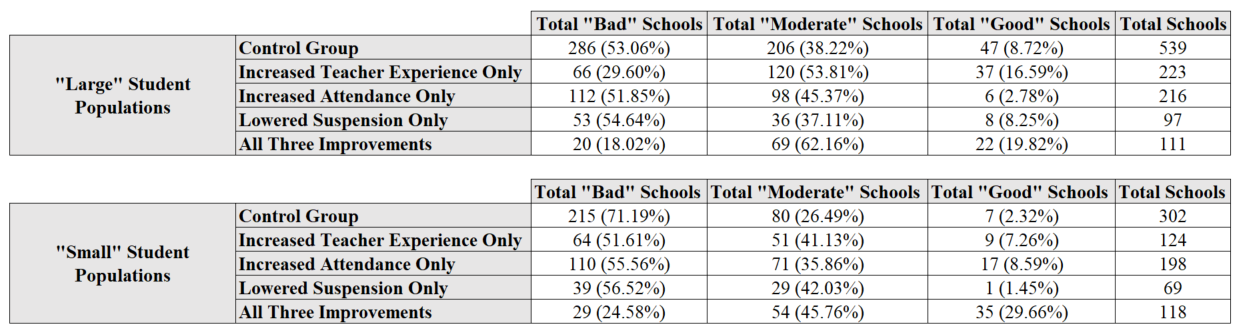

In [3]:
Image("img/tables.png")

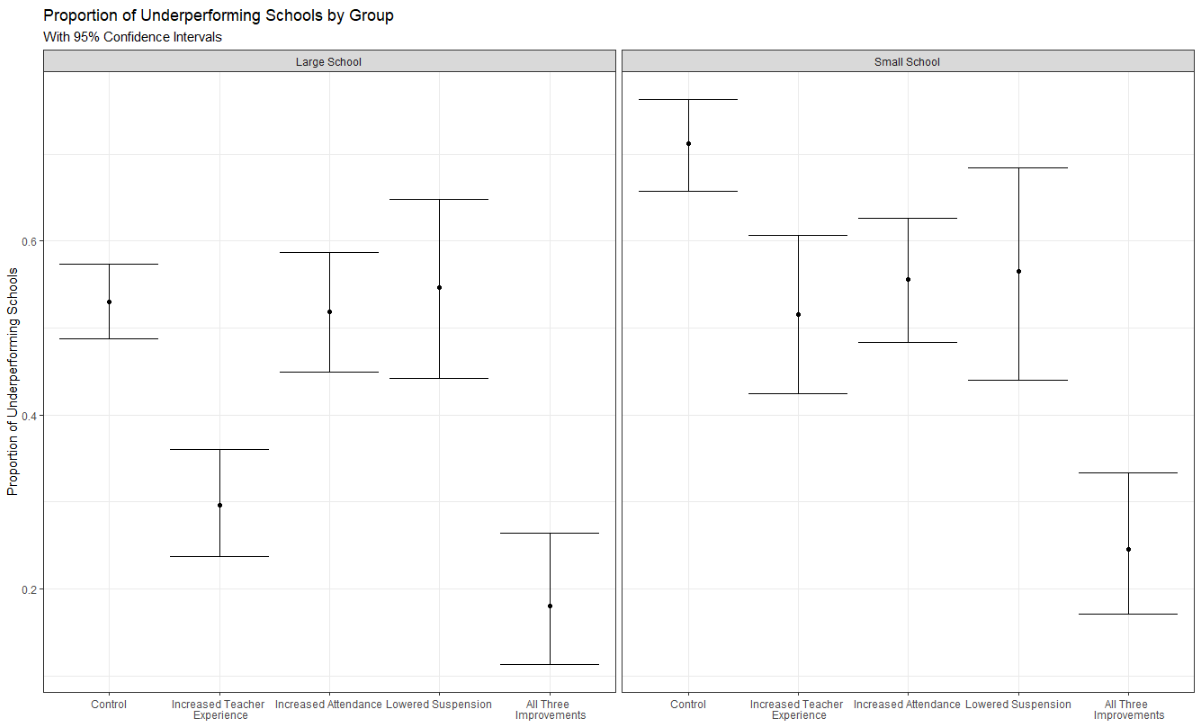

In [7]:
Image("img/graph.png")

#### Conclusions on Association Rule Mining

From the figures above, it is apparent that in schools with highly diverse student populations, increased teacher experience and increased attendance improve the overall quality of the school. The point about teacher experience is particularly interesting, given that it is mostly inner-city (read: diverse) schools are partners in programs such as Teach for America, which place recent college grads in teaching positions. Perhaps this analysis shows a net-negative effect of such programs, and a need for more experienced educators in diverse classrooms. While we cannot make any causal claims on this topic, further investigation is certainly merited.

Given the wide confidence intervals and the discrepancy in effect between large and small schools, it appears that reducing suspensions does not necessarily improve school quality on its own. Furthermore, the question of what we can infer from the statistic is a little fuzzy. Are we saying that reducing suspensions will lead to school performance improvements? Or are we saying that replacing suspensions with another form of disciplinary action will lead to improvements? Further research is needed here.

One final observation is the synergistic effect of all three improvements. In the "all three improvements" group, we see dramatic improvement in school performance. It appears that, holding everything else constant, improving attendance, lowering suspensions, and increasing teacher experience together make for a better school.